In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt 
import seaborn as sns 

main_df=pd.read_csv("/content/sample_data/forestfires Regression.csv")

lets have a look at our dataframe

In [ ]:
main_df.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [ ]:
main_df.describe()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,4.669246,4.299807,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292
std,2.313778,1.229900,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818
min,1.000000,2.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000
25%,3.000000,4.000000,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000
50%,4.000000,4.000000,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000
75%,7.000000,5.000000,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000
max,9.000000,9.000000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000


checking for null values

In [ ]:
main_df.isna().sum()

X        0
Y        0
month    0
day      0
FFMC     0
DMC      0
DC       0
ISI      0
temp     0
RH       0
wind     0
rain     0
area     0
dtype: int64

In [ ]:
main_df["X"].value_counts()

4    91
6    86
2    73
8    61
7    60
3    55
1    48
5    30
9    13
Name: X, dtype: int64

In [ ]:
main_df["day"].value_counts()

sun    95
fri    85
sat    84
mon    74
tue    64
thu    61
wed    54
Name: day, dtype: int64

In [ ]:
main_df["Y"].value_counts()

4    203
5    125
6     74
3     64
2     44
9      6
8      1
Name: Y, dtype: int64

In [ ]:
main_df["month"].value_counts()

aug    184
sep    172
mar     54
jul     32
feb     20
jun     17
oct     15
apr      9
dec      9
jan      2
may      2
nov      1
Name: month, dtype: int64

In [ ]:
main_df["FFMC"].value_counts()

92.1    28
91.6    28
91.0    22
91.7    19
92.4    16
        ..
86.9     1
85.2     1
53.4     1
85.1     1
94.4     1
Name: FFMC, Length: 106, dtype: int64

In [ ]:
main_df["DMC"].value_counts()

99.0     10
129.5     9
231.1     8
142.4     8
35.8      7
         ..
138.1     1
109.2     1
91.6      1
122.3     1
146.0     1
Name: DMC, Length: 215, dtype: int64

In [ ]:
main_df["DC"].value_counts()

745.3    10
692.6     9
692.3     8
715.1     8
698.6     8
         ..
565.5     1
503.6     1
589.9     1
85.3      1
106.7     1
Name: DC, Length: 219, dtype: int64

In [ ]:
main_df["ISI"].value_counts()

9.6     23
7.1     21
6.3     20
8.4     17
7.0     17
        ..
16.5     1
2.2      1
8.3      1
2.0      1
1.1      1
Name: ISI, Length: 119, dtype: int64

In [ ]:
main_df["temp"].value_counts()

17.4    8
19.6    8
15.4    7
20.6    7
20.4    6
       ..
16.3    1
12.8    1
10.4    1
8.7     1
25.6    1
Name: temp, Length: 192, dtype: int64

In [ ]:
main_df["RH"].value_counts()

27    33
39    24
35    20
43    17
42    17
      ..
96     1
97     1
99     1
18     1
69     1
Name: RH, Length: 75, dtype: int64

In [ ]:
main_df["wind"].value_counts()

3.1    53
2.2    53
4.0    51
4.9    48
2.7    44
5.4    41
4.5    41
3.6    40
1.8    31
5.8    24
6.3    19
1.3    14
7.6    14
0.9    13
8.5     8
6.7     8
8.0     5
7.2     4
9.4     4
8.9     1
0.4     1
Name: wind, dtype: int64

In [ ]:
main_df["rain"].value_counts()

0.0    509
0.2      2
0.8      2
1.0      1
6.4      1
0.4      1
1.4      1
Name: rain, dtype: int64

In [ ]:
main_df["area"].value_counts()

0.00      247
1.94        3
0.52        2
3.71        2
0.68        2
         ... 
105.66      1
154.88      1
196.48      1
200.94      1
11.16       1
Name: area, Length: 251, dtype: int64

In [ ]:
main_df["day"].unique()

array(['fri', 'tue', 'sat', 'sun', 'mon', 'wed', 'thu'], dtype=object)

In [ ]:
column_to_label_encode = main_df["day"]
column_to_label_encode.head()

0    fri
1    tue
2    sat
3    fri
4    sun
Name: day, dtype: object

In [ ]:
label_encoder = LabelEncoder()
label_encoded_column = label_encoder.fit_transform(column_to_label_encode)
label_encoded_column

array([0, 5, 2, 0, 3, 3, 1, 1, 5, 2, 2, 2, 0, 1, 6, 0, 2, 1, 6, 2, 5, 1,
       3, 2, 2, 3, 0, 1, 2, 3, 0, 1, 0, 3, 1, 5, 5, 0, 2, 5, 5, 2, 5, 2,
       6, 6, 1, 1, 1, 1, 4, 3, 6, 6, 4, 4, 5, 3, 1, 0, 3, 3, 4, 3, 1, 4,
       0, 0, 0, 0, 0, 0, 0, 5, 0, 4, 0, 1, 0, 5, 3, 3, 5, 6, 4, 4, 4, 4,
       3, 2, 2, 0, 3, 3, 1, 3, 2, 2, 3, 3, 3, 5, 5, 2, 2, 0, 4, 3, 2, 1,
       0, 0, 3, 1, 5, 5, 2, 2, 1, 4, 1, 1, 3, 5, 0, 3, 1, 0, 6, 3, 2, 1,
       3, 4, 5, 2, 3, 1, 5, 5, 1, 6, 0, 2, 6, 4, 1, 5, 5, 4, 0, 3, 2, 0,
       2, 3, 2, 6, 6, 0, 1, 4, 2, 2, 3, 4, 6, 6, 0, 4, 6, 6, 3, 1, 2, 2,
       4, 3, 6, 5, 3, 1, 3, 1, 0, 5, 3, 1, 2, 3, 0, 4, 5, 6, 5, 0, 4, 4,
       5, 1, 5, 3, 3, 6, 2, 4, 2, 5, 0, 4, 2, 2, 0, 1, 2, 2, 3, 1, 6, 1,
       3, 0, 1, 0, 6, 3, 1, 2, 3, 2, 6, 3, 5, 5, 2, 3, 2, 5, 2, 3, 6, 0,
       3, 3, 3, 3, 3, 6, 6, 6, 6, 6, 6, 4, 4, 4, 2, 2, 2, 2, 1, 0, 0, 0,
       0, 5, 5, 5, 5, 5, 5, 5, 5, 3, 6, 4, 1, 1, 1, 1, 0, 5, 3, 6, 0, 3,
       6, 2, 2, 2, 2, 2, 0, 5, 5, 3, 3, 3, 6, 2, 1,

In [ ]:
column_to_label_encode2 = main_df["month"]
column_to_label_encode2.head()

0    mar
1    oct
2    oct
3    mar
4    mar
Name: month, dtype: object

In [ ]:
label_encoder2 = LabelEncoder()
label_encoded_column2 = label_encoder2.fit_transform(column_to_label_encode2)
label_encoded_column2

array([ 7, 10, 10,  7,  7,  1,  1,  1, 11, 11, 11, 11,  1, 11, 11, 11,  7,
       10,  7,  0, 11, 11,  6,  1,  1,  1, 11, 11, 11, 11, 11, 11, 11, 11,
       11, 11, 10, 10, 10,  7,  5,  1,  1, 11, 11, 11, 11,  5,  7,  7, 11,
        1,  1,  1,  1, 11, 11, 10,  3,  3,  7,  7,  1,  1,  1,  1, 11, 11,
       11,  7,  7, 11,  7,  1, 11,  3,  3,  7,  1,  1,  1,  1,  1,  1,  1,
       11, 11, 11, 11,  7,  1,  7,  1,  1,  1, 11,  3,  7,  1,  1,  1,  1,
        1, 11,  4,  7,  7,  1, 11, 11,  7,  7, 11, 11,  7,  7,  7,  7,  7,
        1,  1,  1, 11, 11, 11, 10,  7, 11, 10, 10,  3,  7,  7, 11,  7,  1,
       11, 11,  5, 11, 11,  1,  1,  5,  1,  1,  7, 11,  1, 11,  6,  5,  5,
       11, 11,  1, 11,  1,  1, 11,  7,  1,  7, 11, 11,  7,  1,  1,  7,  1,
       11,  1,  1, 11,  1,  1,  0,  1, 11,  1, 11, 10,  3, 10,  1, 11,  7,
       11,  7,  7,  7,  1,  1, 11,  1,  1,  0, 11, 11, 11, 11,  7,  3, 10,
        7, 11,  1, 11, 11, 11, 10,  1, 11,  7,  7,  7, 11, 11, 11,  7,  1,
       11,  7,  5, 11, 11

In [ ]:
main_df["month"]=label_encoded_column2

In [ ]:
main_df["day"]=label_encoded_column

In [ ]:
main_df.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,7,0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,10,5,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,10,2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,7,0,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,7,3,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [ ]:
main_df.drop(axis="columns", labels="rain", inplace=True) 

In [ ]:
main_df.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,area
0,7,5,7,0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0
1,7,4,10,5,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0
2,7,4,10,2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0
3,8,6,7,0,91.7,33.3,77.5,9.0,8.3,97,4.0,0.0
4,8,6,7,3,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0


# **Finding the correlation among the feature**

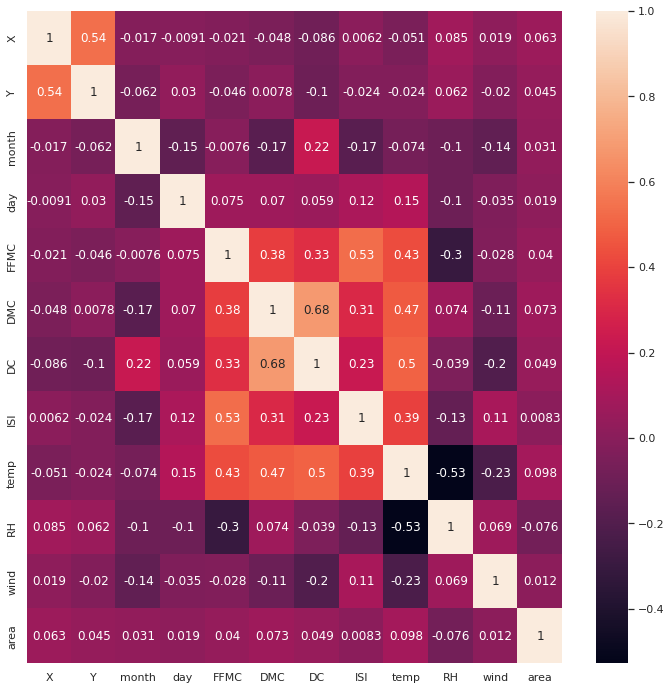

In [ ]:
plt.rcParams['figure.figsize'] = [12, 12]
sns.set(font_scale = 1)
sns.heatmap(main_df.corr(), annot = True);

In [ ]:
# removing features having very less correlation with the result, and also features which are dependent on other features
main_df.drop(["RH","ISI"],axis=1,inplace=True)

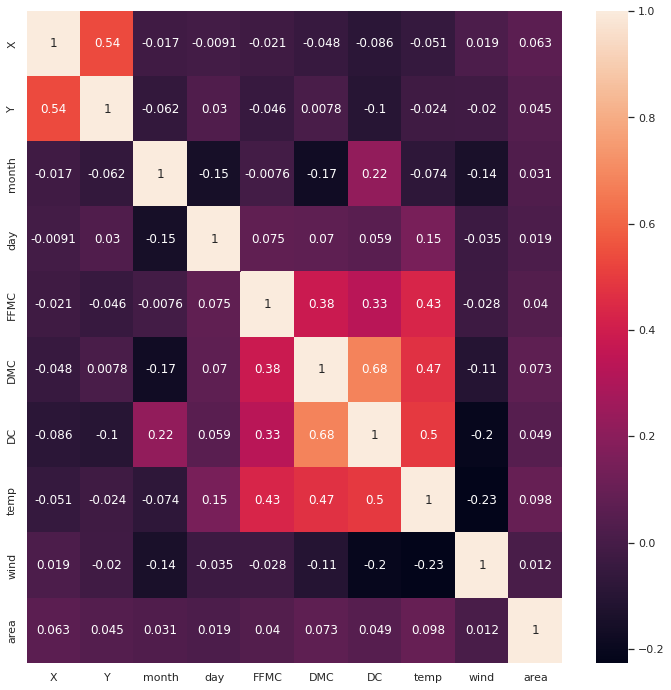

In [ ]:
plt.rcParams['figure.figsize'] = [12, 12]
sns.set(font_scale = 1)
sns.heatmap(main_df.corr(), annot = True);

# **Removing Duplicates**

In [ ]:
main_df.duplicated().sum()

4

In [ ]:
main_df.drop(axis="rows", labels=main_df.index[main_df.duplicated()], inplace=True)

In [ ]:
main_df.duplicated().sum()

0

# **Data Visualization**

In [ ]:
def plot_all(data,cols):
  plt.figure(figsize=(25,20))
  c=1
  for col in cols:
    plt.subplot(4,4,c)
    plt.grid()
    plt.scatter(data[col],data["area"])
    plt.xlabel(col)
    plt.ylabel("Area")
    c+=1
  plt.show()

In [ ]:
cols=list(main_df.columns)
cols

['X', 'Y', 'month', 'day', 'FFMC', 'DMC', 'DC', 'temp', 'wind', 'area']

In [ ]:
del cols[9]
cols

['X', 'Y', 'month', 'day', 'FFMC', 'DMC', 'DC', 'temp', 'wind']

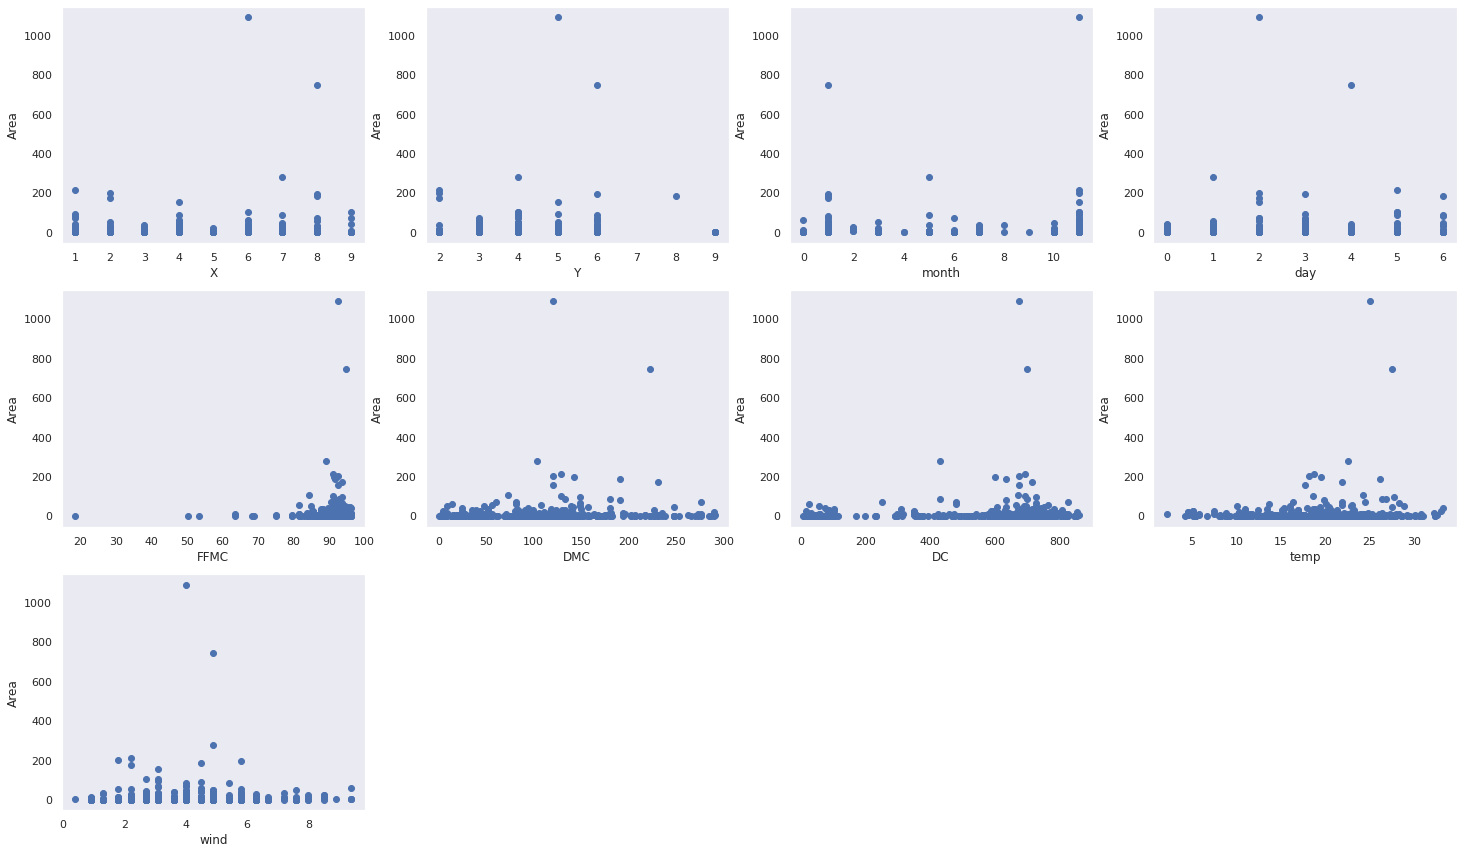

In [ ]:
#plotting all scatterplots for all features
plot_all(main_df,cols)

In [ ]:
#removing rows with outliers
main_df.drop(axis="rows", labels=main_df.index[main_df["area"]>600], inplace=True)

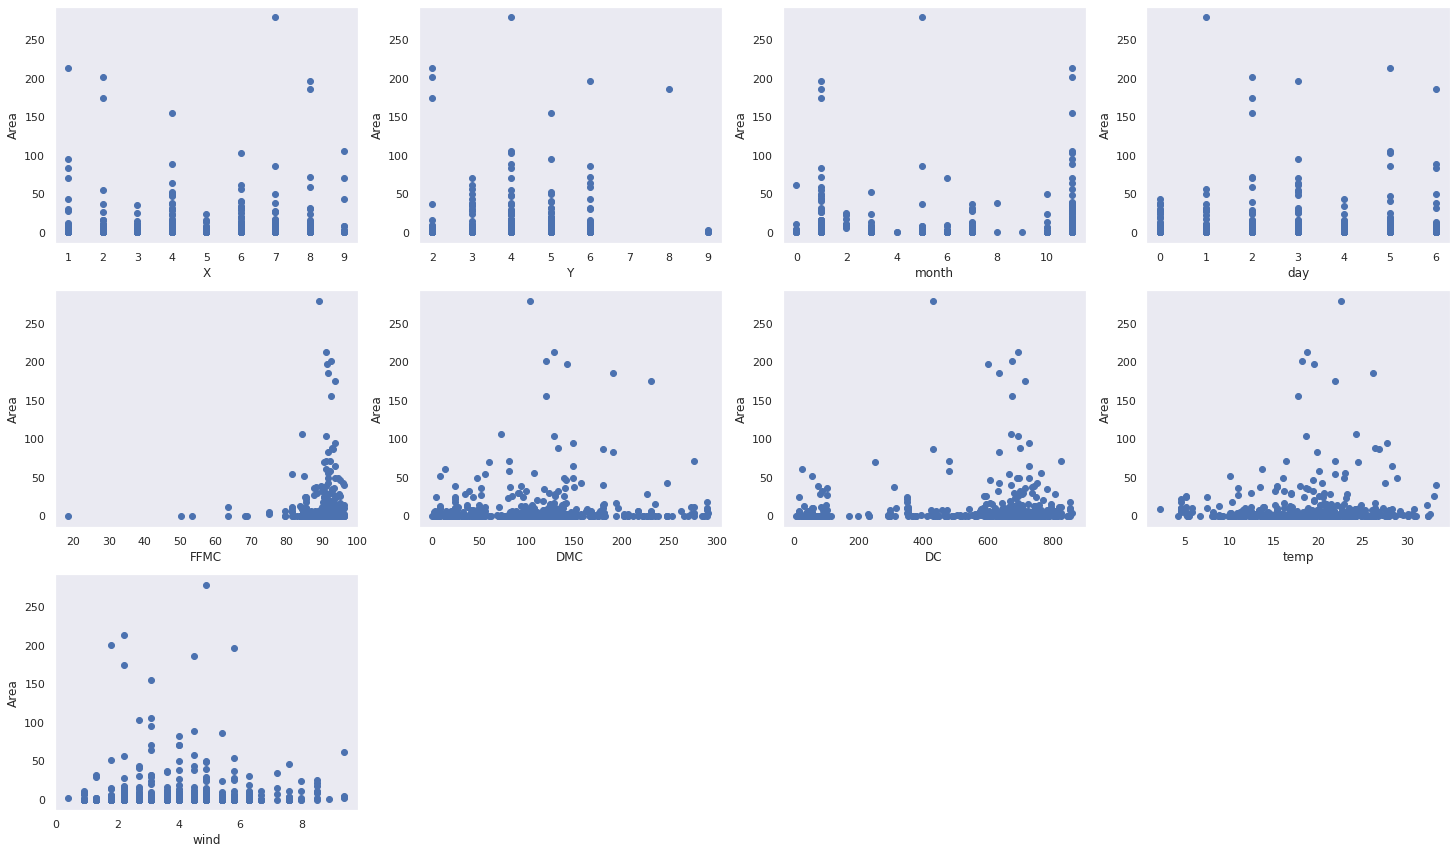

In [ ]:
#plotting all scatterplots for all features
plot_all(main_df,cols)

# **Linear Regression**

In [ ]:
 #normalize
def normalize(x):
  max=np.amax(x,axis=0)
  min=np.amin(x,axis=0)
  for row in x:
    for i in range(len(row)):
      row[i]=10*(row[i]-min[i])/(max[i]-min[i])
  return x

# splitting into training and testing dataset:

In [ ]:
train = main_df.sample(frac = 0.6, replace = False)         #Returns training and testing data
test = main_df.drop(train.index)

train = train.to_numpy()
test = test.to_numpy()

y_train = train[:,1]
x_train = normalize(np.delete(train,1,1))
x_train = np.insert(x_train, 0, np.ones(len(x_train)), axis=1) 

y_test = test[:,1]
x_test = normalize(np.delete(test,1,1))
x_test = np.insert(x_test, 0, np.ones(len(y_test)), axis=1)

In [ ]:
x_train

array([[1.        , 3.75      , 4.54545455, ..., 8.2781457 , 1.        ,
        0.08267569],
       [1.        , 7.5       , 6.36363636, ..., 3.0794702 , 4.        ,
        0.38707253],
       [1.        , 3.75      , 0.90909091, ..., 5.03311258, 3.        ,
        0.        ],
       ...,
       [1.        , 2.5       , 4.54545455, ..., 5.1986755 , 2.55555556,
        0.        ],
       [1.        , 8.75      , 0.90909091, ..., 5.92715232, 4.55555556,
        2.73863209],
       [1.        , 3.75      , 2.72727273, ..., 3.97350993, 4.        ,
        0.        ]])

In [ ]:
# find mean absolute error and mean squared error
def errors(y_pred, y_test, method):
  MeanAbsoluteError = np.mean(np.abs(y_pred - y_test))
  MeanSquaredError = np.mean(np.square(y_pred - y_test))
  print('\033[4m' + method + ' solution' + '\033[0m')
  print('Mean Absolute Error: ' + str(round(MeanAbsoluteError, 2)) + "      " + 'Mean Squared Error: ' + str(round(MeanSquaredError, 2)))
  print("")

In [ ]:
def plotLine(xtrain, ytrain, coeff, method, xfeature):       #Plots scattered plot and line
  plt.xlabel(' Normalized ' + xfeature)
  plt.ylabel('area')
  if method:
    plt.title(method + ' Solution')
  else:
    plt.title('Given')
  plt.scatter(xtrain[:,1], ytrain)
  plt.grid()
  x = np.linspace(0, 10, 100)
  if coeff is not None:
    plt.plot(x, coeff[0]+coeff[1]*x, 'r', linewidth=3)

In [ ]:
def plotCost(cost, method): #plot the cost function graph
  plt.plot(cost)
  plt.xlabel('iteration')
  plt.ylabel('Cost')
  plt.title('Cost curve (' + method + ' solution)')
  plt.grid()

# **Closed Form Solution**

In [ ]:
def closedForm(x, y):              #Returns coefficients of line using closed form solution
  return np.dot(np.dot(np.linalg.inv(np.dot(x.T, x)), x.T), y)

# **Gradient Descent Method:**

In [ ]:
def gradient_descent(x, y, coeff, iterations, mu):
  costs = np.ones(iterations)
  for i in range(iterations):
    predicted = np.dot(x, coeff)
    error = predicted - y
    cost = np.sum(error ** 2) / len(x)
    costs[i] = cost
    grad = np.dot(x.transpose(), error) / len(x)
    coeff = coeff - mu * grad
  return coeff, costs

In [ ]:
def model( x,coeff):
  y_pred= np.dot(x, coeff)
  return y_pred

# **Multivariate**

In [ ]:
theta_cf = closedForm(x_train, y_train) #finding theta using closed form

theta_gd_init=[1]*len(x_train[0])
it = 150
alpha=0.001
theta_gd, cost_gd=gradient_descent(x_train,y_train,theta_gd_init,it,alpha)

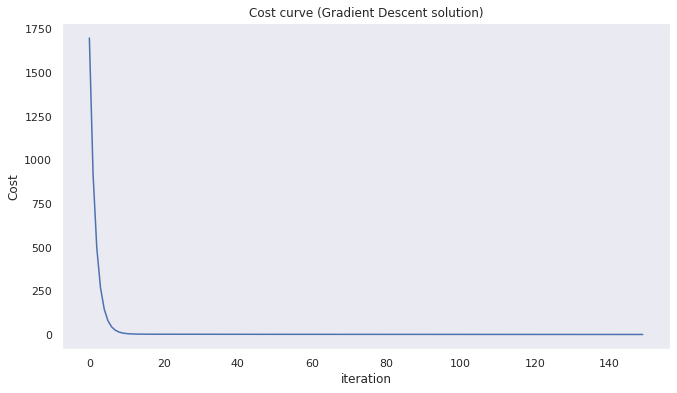

In [ ]:
plt.figure(figsize=(24, 6))
plt.subplot(1,2,1)
plotCost(cost_gd, 'Gradient Descent')

In [ ]:

theta_gd

array([ 0.87165588,  0.31886035,  0.09736435,  0.11100003, -0.2217838 ,
        0.28527859, -0.08208195,  0.13642791,  0.33296582,  0.76423033])

In [ ]:
theta_cf

array([ 4.23296428e+00,  2.41140890e-01, -4.00492606e-03,  3.16444367e-04,
       -6.16341501e-02,  7.07682935e-02, -5.59744293e-02, -2.55274957e-02,
       -4.39616615e-02, -5.24478250e-02])

# **Testing our models**

In [ ]:
y_pred_gd=model(x_test,theta_gd)

In [ ]:
y_pred_cf=model(x_test,theta_cf)

In [ ]:
errors(y_pred_gd, y_test, "Gradient Descent")

Gradient Descent solution
Mean Absolute Error: 1.18      Mean Squared Error: 2.53



In [ ]:
errors(y_pred_cf, y_test, "Closed Form")

Closed Form solution
Mean Absolute Error: 0.81      Mean Squared Error: 0.99



# **Univariate**

In [ ]:
def featureMatrix(feature):
  i = main_df.columns.get_loc(feature) 
  if feature == 'area':
    i += 1
  ux_train = np.array([x_train[:,0], x_train[:,i]]).T
  ux_test = np.array([x_test[:,0], x_test[:,i]]).T
  return ux_train, ux_test, y_train, y_test

Gradient Descent solution
Mean Absolute Error: 0.87      Mean Squared Error: 1.3

Closed Form solution
Mean Absolute Error: 0.91      Mean Squared Error: 1.31



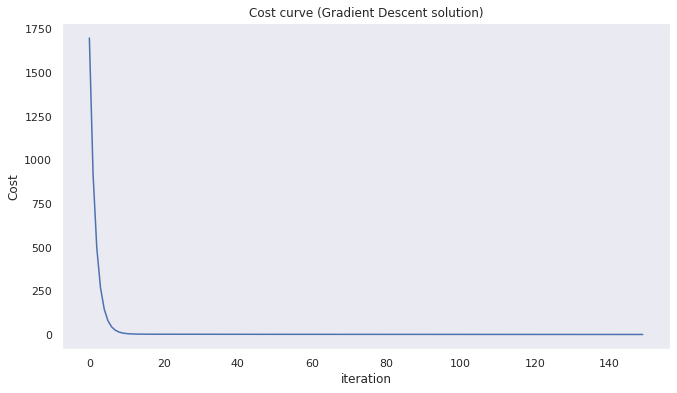

In [ ]:
feature = 'temp'
ux_train, ux_test, uy_train, uy_test = featureMatrix(feature)

theta_cf = closedForm(ux_train, uy_train) #finding theta using closed form

theta_gd_init=[1]*len(ux_train[0])
it = 1500
alpha=0.01
theta_gdu, cost_gdu=gradient_descent(ux_train,uy_train,theta_gd_init,it,alpha)

plt.figure(figsize=(24, 6))
plt.subplot(1,2,1)
plotCost(cost_gd, 'Gradient Descent')

y_pred_gd=model(ux_test,theta_gdu)

y_pred_cf=model(ux_test,theta_cf)

errors(y_pred_gd, y_test, "Gradient Descent")
errors(y_pred_cf, y_test, "Closed Form")



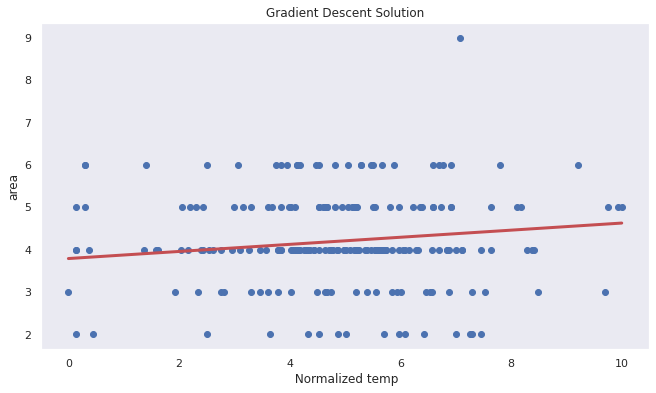

In [ ]:
plt.figure(figsize=(24, 6))
plt.subplot(1,2,1)
plotLine(ux_test, uy_test, theta_gdu, 'Gradient Descent', feature)

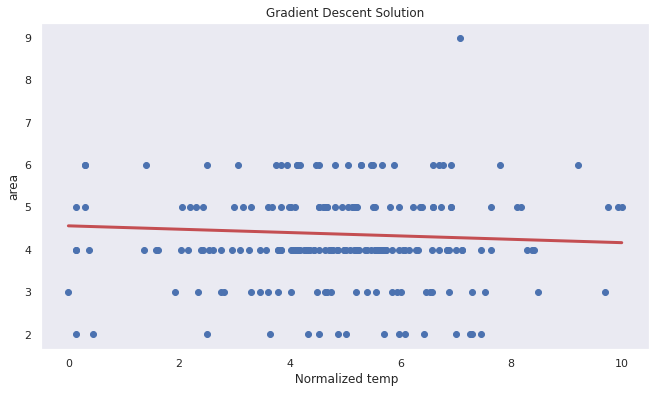

In [ ]:
plt.figure(figsize=(24, 6))
plt.subplot(1,2,1)
plotLine(ux_test, uy_test, theta_cf, 'Gradient Descent', feature)